In [17]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
data=pd.read_csv('titanic.csv')

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
data.drop('Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
X=data.drop(['Ticket', "Name","PassengerId","Survived","Cabin"],axis=1)
y=data.Survived

In [22]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [23]:
X=pd.get_dummies(X) #Метод для автоматического разбиения на 0 и единицы текстовых переменных, например Пол
X # лучше убрать повторяющиеся столбцы (N-1). Например девушки дублируют парней

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [24]:
X.Age.median() #но лучше сделать другую модель. Это самый простой способ

28.0

In [25]:
X=X.fillna({'Age': X.Age.median()})

In [26]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [27]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6164146807553957, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]\nclass = Negative'),
 Text(0.39222684352517984, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]\nclass = Negative'),
 Text(0.19475044964028776, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]\nclass = Negative'),
 Text(0.06654676258992806, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]\nclass = Positive'),
 Text(0.05935251798561151, 0.775, 'Age <= 10.0\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]\nclass = Positive'),
 Text(0.052158273381294966, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Positive'),
 Text(0.06654676258992806, 0.725, 'SibSp <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Negative'),
 Text(0.05935251798561151, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative'),
 Text(0.0737410071942446, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 

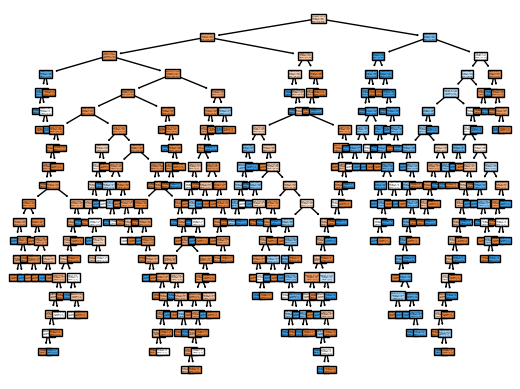

In [28]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True) #почему дерево такое большое? Мы его переобучили

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42) # Метод для разделения на тестовую и нашу выборку

In [30]:
clf.score(X,y)# предсказание. В 97 процентах случае правильно класифицировали

0.9797979797979798

In [31]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9798657718120806

In [32]:
clf.score(X_test,y_test) # Всего 77 процентов - Видимо мы переобучили дерево. Причина - много ресурсов

0.7661016949152543

Теперь ограничим глубину дерево - 5

In [33]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [34]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8238255033557047

In [35]:
clf.score(X_test,y_test) # Следовательно 3 вопроса - максимально эффективно

0.8203389830508474

In [36]:
max_depth_values=range(1,100)

In [37]:
max_depth_list=[]
train_score_list=[]
test_score_list=[]
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    max_depth_list.append(max_depth)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
score_data = pd.DataFrame({'max_depth': max_depth_list, 'train_score': train_score_list, 'test_score': test_score_list})

In [38]:
score_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
1,2,0.805369,0.776271
2,3,0.823826,0.820339
3,4,0.833893,0.823729
4,5,0.840604,0.806780
...,...,...,...
94,95,0.979866,0.766102
95,96,0.979866,0.779661
96,97,0.979866,0.786441
97,98,0.979866,0.776271


In [39]:
scores_data_long=pd.melt(score_data,id_vars=['max_depth'],value_vars=['train_score','test_score'],var_name='set_type',value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

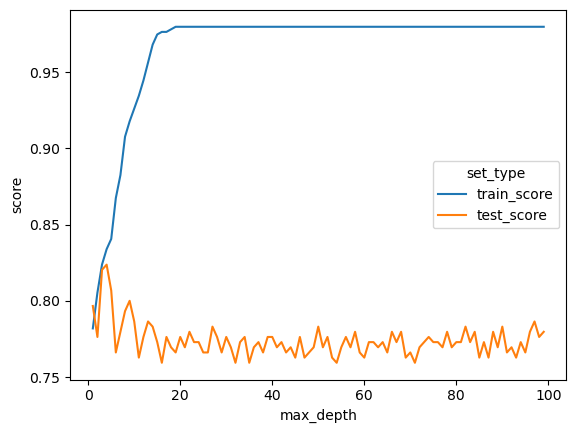

In [40]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=scores_data_long)

Здесь мы видим от 0 до 2 недообучение, в 3 максимум, а после переобучение

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


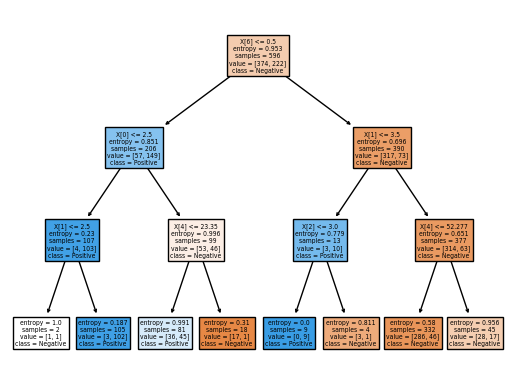

In [41]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)
tree.plot_tree(clf,class_names=["Negative","Positive"],filled=True)
print(X_train.columns)

Кросс валидация 

In [42]:
from sklearn.model_selection import cross_val_score
clf =tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [43]:
q=cross_val_score(clf,X_train,y_train,cv=5)

In [44]:
q.mean()

0.7886274509803922

In [45]:
max_depth_list=[]
train_score_list=[]
test_score_list=[]
mean_cross_val_score_list=[]
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    max_depth_list.append(max_depth)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    mean_cross_val_score_list.append(mean_cross_val_score)
score_data = pd.DataFrame({'max_depth': max_depth_list, 'train_score': train_score_list,\
                           'test_score': test_score_list,'cross_val_score':mean_cross_val_score_list})

In [46]:
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.788627
4,5,0.840604,0.806780,0.800392


In [47]:
scores_data_long=pd.melt(score_data,id_vars=['max_depth'],\
                         value_vars=['train_score','test_score','cross_val_score'],\
                         var_name='set_type',value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

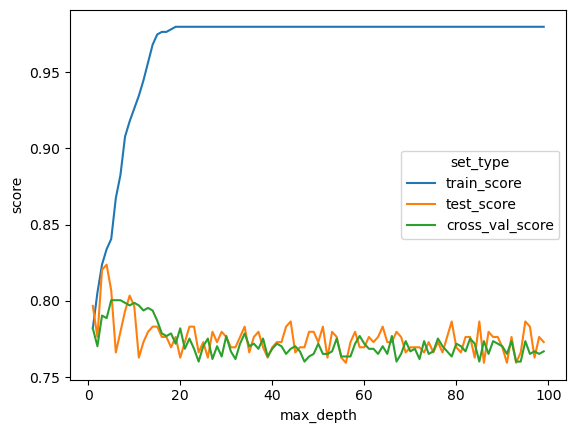

In [48]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=scores_data_long)

cross_val_score -более устройчивый параметр. Ему можно доверять. Это глубина - 10

In [49]:
best_clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [50]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

0.7932203389830509

Наша модель готова!